In [30]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', 90)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.neighbors import KNeighborsRegressor
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

from catboost import CatBoostRegressor
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


In [31]:
df = pd.read_csv('Train.csv')

In [32]:
df.head()

,sku_name,starting_inventory,sellin,sellin_channel_1,sellin_channel_2,sellin_channel_3,sellin_channel_4,sellin_channel_5,sellin_channel_6,sellin_channel_7,sellin_channel_8,sellout,onhand_inventory,leftover_inventory,sellout_channel_1,sellout_channel_2,sellout_channel_3,sellout_channel_4,sellout_channel_5,sellout_channel_6,sellout_channel_7,sellout_channel_8,sellout_channel_9,sellout_channel_10,onhand_inventory_channel_1,onhand_inventory_channel_2,onhand_inventory_channel_3,onhand_inventory_channel_4,onhand_inventory_channel_5,onhand_inventory_channel_6,onhand_inventory_channel_7,onhand_inventory_channel_8,onhand_inventory_channel_9,onhand_inventory_channel_10,price,month,year,product_lifecycle_stage,FLAG100,disc_month,cum_disc,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,Weeks
0,YOSHWARDTERR,0,1013,0,0,0,1013,0,0,0,0,1013,0,0,0,0,0,1013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,7,2016,U,0.000000,0,0,0,1,0,1
1,YOSHWARDTERR,0,2026,0,0,0,2026,0,0,0,0,0,1013,2026,0,0,0,0,0,0,0,0,0,0,0,0,0,1013,0,0,0,0,0,0,95,2,2017,U,0.000000,0,0,0,1,0,0
2,YOSHWARDTERR,0,1013,0,0,0,1013,0,0,0,0,1013,0,0,0,0,0,1013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,5,2017,U,0.000000,0,0,0,1,0,0
3,YOSHUANEMARX,0,320108,4052,40520,240081,4052,6078,18234,0,0,56728,259328,263380,0,1013,43559,0,0,12156,0,0,0,0,0,39507,190444,6078,0,0,0,0,0,23299,155,4,2018,W,0.270966,1,1,0,0,1,1
4,YOSHUANEMARX,0,132703,2026,0,81040,3039,25325,18234,0,0,90157,270471,42546,0,3039,69897,6078,0,8104,0,0,0,3039,0,36468,202600,3039,0,0,0,7091,0,21273,155,5,2018,W,0.063004,0,1,0,0,1,0


In [33]:
df.isnull().sum()

sku_name                       0
starting_inventory             0
sellin                         0
sellin_channel_1               0
sellin_channel_2               0
sellin_channel_3               0
sellin_channel_4               0
sellin_channel_5               0
sellin_channel_6               0
sellin_channel_7               0
sellin_channel_8               0
sellout                        0
onhand_inventory               0
leftover_inventory             0
sellout_channel_1              0
sellout_channel_2              0
sellout_channel_3              0
sellout_channel_4              0
sellout_channel_5              0
sellout_channel_6              0
sellout_channel_7              0
sellout_channel_8              0
sellout_channel_9              0
sellout_channel_10             0
onhand_inventory_channel_1     0
onhand_inventory_channel_2     0
onhand_inventory_channel_3     0
onhand_inventory_channel_4     0
onhand_inventory_channel_5     0
onhand_inventory_channel_6     0
onhand_inv

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44907 entries, 0 to 44906
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sku_name                     44907 non-null  object 
 1   starting_inventory           44907 non-null  int64  
 2   sellin                       44907 non-null  int64  
 3   sellin_channel_1             44907 non-null  int64  
 4   sellin_channel_2             44907 non-null  int64  
 5   sellin_channel_3             44907 non-null  int64  
 6   sellin_channel_4             44907 non-null  int64  
 7   sellin_channel_5             44907 non-null  int64  
 8   sellin_channel_6             44907 non-null  int64  
 9   sellin_channel_7             44907 non-null  int64  
 10  sellin_channel_8             44907 non-null  int64  
 11  sellout                      44907 non-null  int64  
 12  onhand_inventory             44907 non-null  int64  
 13  leftover_invento

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
starting_inventory,44907.0,364829.670541,1.307197e+06,0.0,0.0,0.0,1013.000000,22385274.0
sellin,44907.0,246953.280246,5.396038e+05,-1013.0,2026.0,22286.0,234003.000000,11396250.0
sellin_channel_1,44907.0,130760.463603,3.671458e+05,0.0,0.0,1013.0,65845.000000,10193819.0
sellin_channel_2,44907.0,33968.287661,1.016882e+05,0.0,0.0,0.0,10130.000000,3211210.0
sellin_channel_3,44907.0,23096.612043,6.618159e+04,0.0,0.0,0.0,15195.000000,1378693.0
sellin_channel_4,44907.0,14840.618055,1.018736e+05,0.0,0.0,0.0,2026.000000,3448252.0
sellin_channel_5,44907.0,9593.847863,4.255511e+04,0.0,0.0,0.0,0.000000,876245.0
sellin_channel_6,44907.0,8523.664017,3.072036e+04,-1013.0,0.0,1013.0,7091.000000,1737295.0
sellin_channel_7,44907.0,7648.266172,4.096964e+04,0.0,0.0,0.0,0.000000,3096741.0
sellin_channel_8,44907.0,5769.432806,4.092453e+04,0.0,0.0,0.0,0.000000,1499240.0


In [36]:
skew_df = pd.DataFrame(df.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(df[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,starting_inventory,5.730503,5.730503,True
1,sellin,4.615884,4.615884,True
2,sellin_channel_1,6.084942,6.084942,True
3,sellin_channel_2,6.894902,6.894902,True
4,sellin_channel_3,5.723030,5.723030,True
5,sellin_channel_4,12.576361,12.576361,True
6,sellin_channel_5,7.750568,7.750568,True
7,sellin_channel_6,17.670441,17.670441,True
8,sellin_channel_7,26.473970,26.473970,True
9,sellin_channel_8,15.262704,15.262704,True


In [37]:
df.corr()

,starting_inventory,sellin,sellin_channel_1,sellin_channel_2,sellin_channel_3,sellin_channel_4,sellin_channel_5,sellin_channel_6,sellin_channel_7,sellin_channel_8,sellout,onhand_inventory,leftover_inventory,sellout_channel_1,sellout_channel_2,sellout_channel_3,sellout_channel_4,sellout_channel_5,sellout_channel_6,sellout_channel_7,sellout_channel_8,sellout_channel_9,sellout_channel_10,onhand_inventory_channel_1,onhand_inventory_channel_2,onhand_inventory_channel_3,onhand_inventory_channel_4,onhand_inventory_channel_5,onhand_inventory_channel_6,onhand_inventory_channel_7,onhand_inventory_channel_8,onhand_inventory_channel_9,onhand_inventory_channel_10,price,month,year,FLAG100,disc_month,cum_disc,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,Weeks
starting_inventory,1.000000,0.440898,0.453275,0.275484,0.162112,-0.034422,0.239737,0.099611,0.314297,-0.032089,0.359623,0.517223,0.292467,0.354978,0.264012,0.264576,-0.051597,0.308487,0.089097,0.440233,0.109097,0.201968,0.370268,0.539987,0.294519,0.305746,-0.073036,0.369483,NaN,0.444406,0.118631,0.222567,0.493415,-0.017445,0.022575,0.077422,0.026621,0.073456,0.096762,-0.031579,-0.017869,0.024908,0.013748
sellin,0.440898,1.000000,0.934619,0.644332,0.453059,0.206730,0.430291,0.260087,0.531310,0.119088,0.693908,0.748950,0.771019,0.653151,0.451050,0.530112,0.052685,0.502887,0.232512,0.571753,0.186962,0.471322,0.631169,0.742056,0.435818,0.477110,0.048167,0.532012,NaN,0.531100,0.216869,0.419481,0.699449,-0.033001,0.073977,-0.045199,0.047484,0.147573,0.152189,-0.050115,0.023059,-0.011770,-0.005004
sellin_channel_1,0.453275,0.934619,1.000000,0.504755,0.338491,-0.010130,0.347477,0.177517,0.476426,-0.004022,0.678915,0.727778,0.693746,0.687870,0.407753,0.479994,-0.040022,0.487243,0.154085,0.565955,0.168541,0.433070,0.604871,0.761629,0.388987,0.416063,-0.065381,0.513072,NaN,0.523229,0.187971,0.381582,0.679600,-0.033907,0.088215,-0.029019,0.034065,0.117354,0.112165,-0.040292,0.023926,-0.014837,-0.004005
sellin_channel_2,0.275484,0.644332,0.504755,1.000000,0.242143,-0.003514,0.273330,0.098772,0.317326,-0.013154,0.324191,0.429560,0.605497,0.300774,0.326089,0.296217,-0.041972,0.272114,0.087238,0.305012,0.118122,0.298793,0.347569,0.415192,0.326581,0.348814,-0.062598,0.316241,NaN,0.298636,0.157098,0.283184,0.453700,-0.040490,-0.010105,0.015095,0.024490,0.080984,0.104491,-0.037795,0.006983,0.001507,-0.017145
sellin_channel_3,0.162112,0.453059,0.338491,0.242143,1.000000,-0.005221,0.175846,0.171467,0.165568,-0.044766,0.271761,0.264949,0.387010,0.249758,0.149602,0.436773,-0.064197,0.149097,0.155526,0.185276,0.076470,0.157209,0.284312,0.232441,0.133982,0.483630,-0.080313,0.155514,NaN,0.171606,0.114563,0.120811,0.286417,0.016973,0.072531,-0.100879,0.046356,0.118210,0.114948,-0.039500,0.014189,-0.005300,0.011624
sellin_channel_4,-0.034422,0.206730,-0.010130,-0.003514,-0.005221,1.000000,0.004403,0.080833,-0.013805,0.285019,0.127108,0.103665,0.173846,0.012322,0.049794,0.015358,0.406807,0.049142,0.064724,0.000805,0.033456,0.029171,0.047690,0.017135,0.068309,-0.033157,0.507032,0.031878,NaN,0.014264,0.037874,0.039981,0.028992,0.010308,0.010604,-0.044437,0.005154,0.043149,0.059173,-0.015444,0.001147,0.002318,0.002143
sellin_channel_5,0.239737,0.430291,0.347477,0.273330,0.175846,0.004403,1.000000,0.053504,0.213250,-0.009397,0.245325,0.326526,0.378863,0.217763,0.210184,0.207787,-0.008553,0.332277,0.051459,0.277263,0.068669,0.219025,0.242942,0.323389,0.194627,0.208808,-0.033398,0.368697,NaN,0.231192,0.063747,0.205012,0.298313,-0.047927,-0.004052,0.000286,-0.000165,0.029647,0.038828,-0.025450,-0.028119,0.033759,-0.012419
sellin_channel_6,0.099611,0.260087,0.177517,0.098772,0.171467,0.080833,0.053504,1.000000,0.089392,0.067393,0.333197,0.155779,0.065469,0.246097,0.101784,0.345371,0.035248,0.161734,0.973411,0.093611,0.090394,0.107013,0.276109,0.141004,0.071265,0.163478,0.038471,0.099984,NaN,0.095453,0.096713,0.051082,0.157534,0.005970,0.071802,0.082552,0.208560,0.313917,0.262062,-0.007197,0.030804,-0.029119,0.050743
sel

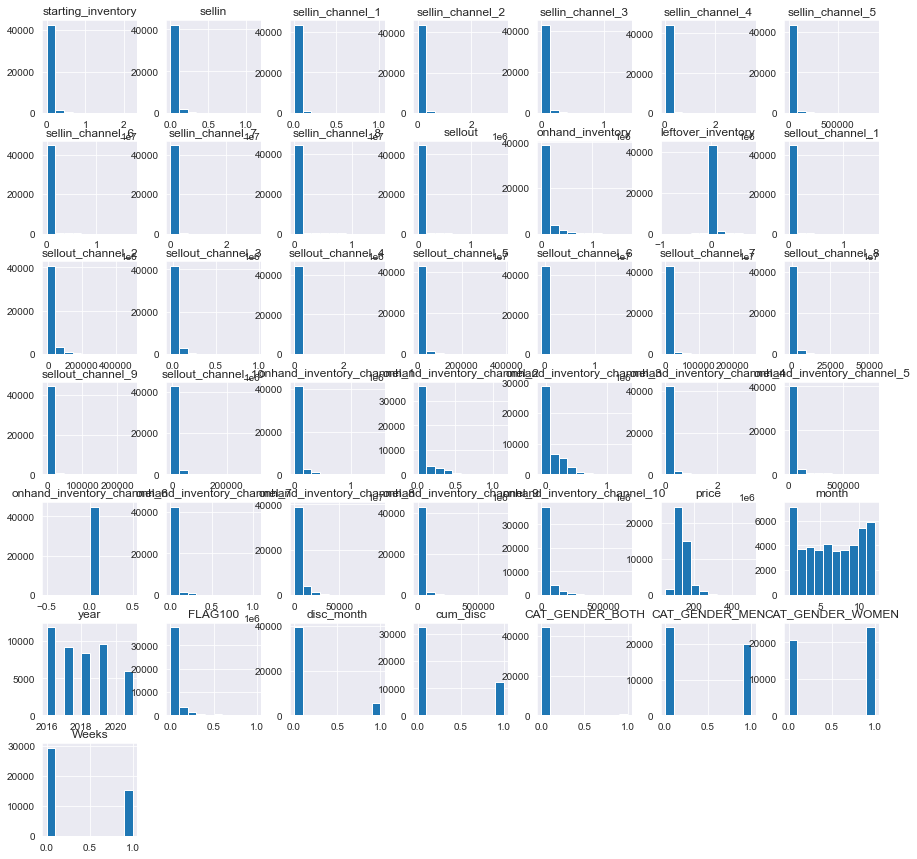

In [38]:
df.hist(figsize=(15,15));

In [39]:
df.onhand_inventory_channel_6.value_counts()

0    44907
Name: onhand_inventory_channel_6, dtype: int64

In [40]:
df = df.drop('onhand_inventory_channel_6',axis=1)

In [41]:
df.product_lifecycle_stage.unique()

array(['U', 'W', 'K', 'N', 'T', 'M', 'L', 'V', 'R', 'O', 'Q', 'Z', 'S',
       'X', 'A'], dtype=object)

In [42]:
df.product_lifecycle_stage.value_counts()

U    16861
W    15837
N     3708
V     1749
O     1730
M     1657
L     1590
X      633
T      472
A      166
K      153
R      116
Z       87
Q       80
S       68
Name: product_lifecycle_stage, dtype: int64

In [43]:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['product_lifecycle_stage']= label_encoder.fit_transform(df['product_lifecycle_stage'])
df['product_lifecycle_stage'].unique()

array([10, 12,  1,  4,  9,  3,  2, 11,  7,  5,  6, 14,  8, 13,  0])

In [44]:
df.sku_name.unique()

array(['YOSHWARDTERR', 'YOSHUANEMARX', 'YOSHUANEBART', ..., 'ABEANHARLE',
       'ABEANDACORE', 'ABEAHAMASHL'], dtype=object)

In [45]:
df.sku_name.value_counts()

BRITEIDALAKE    61
ISAALEENREVA    61
LAKEMARXELLY    61
ARTILANDARTI    61
AMBENORACIND    61
                ..
JULIILLAKATH     1
ERICXIMOGILD     1
JULIIBALRIGO     1
MITCTTNYBRIT     1
REVAKEVAHOWA     1
Name: sku_name, Length: 3868, dtype: int64

In [46]:
df['sku_name']= label_encoder.fit_transform(df['sku_name'])
df['sku_name'].unique()

array([3867, 3866, 3865, ...,    2,    1,    0])

In [47]:
#df = df.drop(['month','year','CAT_GENDER_BOTH','CAT_GENDER_MEN','CAT_GENDER_WOMEN'], axis=1)

In [48]:
y = df['sellin']
X = df.drop('sellin', axis=1)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

In [50]:
# create targets and features dataset
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
params = {'boosting_type': 'gbdt',
              'objective': 'regression',
              'num_leaves': 40,
              'learning_rate': 0.1,
              'feature_fraction': 0.9
              }
feature_name = list(X.columns)
evals={}
gbm = lgb.train(
                params,
                lgb_train,
                num_boost_round=200,
                callbacks = [lgb.record_evaluation(evals)],
                valid_sets=[lgb_train, lgb_eval],
                valid_names=['train','valid']
)

lm = LinearRegression()
rf = RandomForestRegressor(bootstrap=True, max_depth=None, max_features='auto', n_estimators=1000)

C:\Users\F5469333\Anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7371
[LightGBM] [Info] Number of data points in the train set: 31434, number of used features: 43
[LightGBM] [Info] Start training from score 249062.746421
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [51]:
%%time
#rf.fit(X_train, y_train)
y_pred = gbm.predict(X_test)

Wall time: 58.3 ms


In [52]:
from sklearn.metrics import accuracy_score
#y_pred = booster.predict(X_test)

In [53]:
results=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
results

,Actual,Predicted
38239,7091,23302.245553
21918,2026,14078.836863
14800,378862,335337.886533
43177,8104,9394.575433
5099,33429,20383.671563
...,...,...
14188,2026,3157.896952
40432,51663,47681.536820
13644,2026,3157.896952
21102,112443,103487.473522


In [54]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 18389.372985539307
Mean Squared Error: 3074365450.3994055
Root Mean Squared Error: 55446.9606957803


In [55]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 18389.37 degrees.
Accuracy: 25.71 %.


In [56]:
test = pd.read_csv('Test (1).csv')

In [57]:
test.head()

,sku_name,month,year,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN
0,YOSHTLYNYOSHZZ,11,2021,0,1,0
1,YOSHTLYNYOSHZZ,12,2021,0,1,0
2,YOSHTLYNYOSHZZ,1,2022,0,1,0
3,YOSHTLYNYOSHZZ,2,2022,0,1,0
4,YOSHRENECARL,11,2021,0,0,1


In [58]:
test.shape

(1528, 6)

In [59]:
df1 = pd.merge(df, test, left_index=True, right_index=True)

In [60]:
df1.head()

,sku_name_x,starting_inventory,sellin,sellin_channel_1,sellin_channel_2,sellin_channel_3,sellin_channel_4,sellin_channel_5,sellin_channel_6,sellin_channel_7,sellin_channel_8,sellout,onhand_inventory,leftover_inventory,sellout_channel_1,sellout_channel_2,sellout_channel_3,sellout_channel_4,sellout_channel_5,sellout_channel_6,sellout_channel_7,sellout_channel_8,sellout_channel_9,sellout_channel_10,onhand_inventory_channel_1,onhand_inventory_channel_2,onhand_inventory_channel_3,onhand_inventory_channel_4,onhand_inventory_channel_5,onhand_inventory_channel_7,onhand_inventory_channel_8,onhand_inventory_channel_9,onhand_inventory_channel_10,price,month_x,year_x,product_lifecycle_stage,FLAG100,disc_month,cum_disc,CAT_GENDER_BOTH_x,CAT_GENDER_MEN_x,CAT_GENDER_WOMEN_x,Weeks,sku_name_y,month_y,year_y,CAT_GENDER_BOTH_y,CAT_GENDER_MEN_y,CAT_GENDER_WOMEN_y
0,3867,0,1013,0,0,0,1013,0,0,0,0,1013,0,0,0,0,0,1013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,7,2016,10,0.000000,0,0,0,1,0,1,YOSHTLYNYOSHZZ,11,2021,0,1,0
1,3867,0,2026,0,0,0,2026,0,0,0,0,0,1013,2026,0,0,0,0,0,0,0,0,0,0,0,0,0,1013,0,0,0,0,0,95,2,2017,10,0.000000,0,0,0,1,0,0,YOSHTLYNYOSHZZ,12,2021,0,1,0
2,3867,0,1013,0,0,0,1013,0,0,0,0,1013,0,0,0,0,0,1013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,5,2017,10,0.000000,0,0,0,1,0,0,YOSHTLYNYOSHZZ,1,2022,0,1,0
3,3866,0,320108,4052,40520,240081,4052,6078,18234,0,0,56728,259328,263380,0,1013,43559,0,0,12156,0,0,0,0,0,39507,190444,6078,0,0,0,0,23299,155,4,2018,12,0.270966,1,1,0,0,1,1,YOSHTLYNYOSHZZ,2,2022,0,1,0
4,3866,0,132703,2026,0,81040,3039,25325,18234,0,0,90157,270471,42546,0,3039,69897,6078,0,8104,0,0,0,3039,0,36468,202600,3039,0,0,7091,0,21273,155,5,2018,12,0.063004,0,1,0,0,1,0,YOSHRENECARL,11,2021,0,0,1


In [61]:
df1.shape

(1528, 50)

In [62]:
df1 = df1.drop(['sku_name_x','sellin','month_x','year_x','CAT_GENDER_BOTH_x','CAT_GENDER_BOTH_x','CAT_GENDER_WOMEN_x','CAT_GENDER_MEN_x'], axis=1)

In [63]:
df1.head()

,starting_inventory,sellin_channel_1,sellin_channel_2,sellin_channel_3,sellin_channel_4,sellin_channel_5,sellin_channel_6,sellin_channel_7,sellin_channel_8,sellout,onhand_inventory,leftover_inventory,sellout_channel_1,sellout_channel_2,sellout_channel_3,sellout_channel_4,sellout_channel_5,sellout_channel_6,sellout_channel_7,sellout_channel_8,sellout_channel_9,sellout_channel_10,onhand_inventory_channel_1,onhand_inventory_channel_2,onhand_inventory_channel_3,onhand_inventory_channel_4,onhand_inventory_channel_5,onhand_inventory_channel_7,onhand_inventory_channel_8,onhand_inventory_channel_9,onhand_inventory_channel_10,price,product_lifecycle_stage,FLAG100,disc_month,cum_disc,Weeks,sku_name_y,month_y,year_y,CAT_GENDER_BOTH_y,CAT_GENDER_MEN_y,CAT_GENDER_WOMEN_y
0,0,0,0,0,1013,0,0,0,0,1013,0,0,0,0,0,1013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,10,0.000000,0,0,1,YOSHTLYNYOSHZZ,11,2021,0,1,0
1,0,0,0,0,2026,0,0,0,0,0,1013,2026,0,0,0,0,0,0,0,0,0,0,0,0,0,1013,0,0,0,0,0,95,10,0.000000,0,0,0,YOSHTLYNYOSHZZ,12,2021,0,1,0
2,0,0,0,0,1013,0,0,0,0,1013,0,0,0,0,0,1013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,10,0.000000,0,0,0,YOSHTLYNYOSHZZ,1,2022,0,1,0
3,0,4052,40520,240081,4052,6078,18234,0,0,56728,259328,263380,0,1013,43559,0,0,12156,0,0,0,0,0,39507,190444,6078,0,0,0,0,23299,155,12,0.270966,1,1,1,YOSHTLYNYOSHZZ,2,2022,0,1,0
4,0,2026,0,81040,3039,25325,18234,0,0,90157,270471,42546,0,3039,69897,6078,0,8104,0,0,0,3039,0,36468,202600,3039,0,0,7091,0,21273,155,12,0.063004,0,1,0,YOSHRENECARL,11,2021,0,0,1


In [64]:
df1['sku_name_y']= label_encoder.fit_transform(df1['sku_name_y'])

In [65]:
df1.head()

,starting_inventory,sellin_channel_1,sellin_channel_2,sellin_channel_3,sellin_channel_4,sellin_channel_5,sellin_channel_6,sellin_channel_7,sellin_channel_8,sellout,onhand_inventory,leftover_inventory,sellout_channel_1,sellout_channel_2,sellout_channel_3,sellout_channel_4,sellout_channel_5,sellout_channel_6,sellout_channel_7,sellout_channel_8,sellout_channel_9,sellout_channel_10,onhand_inventory_channel_1,onhand_inventory_channel_2,onhand_inventory_channel_3,onhand_inventory_channel_4,onhand_inventory_channel_5,onhand_inventory_channel_7,onhand_inventory_channel_8,onhand_inventory_channel_9,onhand_inventory_channel_10,price,product_lifecycle_stage,FLAG100,disc_month,cum_disc,Weeks,sku_name_y,month_y,year_y,CAT_GENDER_BOTH_y,CAT_GENDER_MEN_y,CAT_GENDER_WOMEN_y
0,0,0,0,0,1013,0,0,0,0,1013,0,0,0,0,0,1013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,10,0.000000,0,0,1,381,11,2021,0,1,0
1,0,0,0,0,2026,0,0,0,0,0,1013,2026,0,0,0,0,0,0,0,0,0,0,0,0,0,1013,0,0,0,0,0,95,10,0.000000,0,0,0,381,12,2021,0,1,0
2,0,0,0,0,1013,0,0,0,0,1013,0,0,0,0,0,1013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,10,0.000000,0,0,0,381,1,2022,0,1,0
3,0,4052,40520,240081,4052,6078,18234,0,0,56728,259328,263380,0,1013,43559,0,0,12156,0,0,0,0,0,39507,190444,6078,0,0,0,0,23299,155,12,0.270966,1,1,1,381,2,2022,0,1,0
4,0,2026,0,81040,3039,25325,18234,0,0,90157,270471,42546,0,3039,69897,6078,0,8104,0,0,0,3039,0,36468,202600,3039,0,0,7091,0,21273,155,12,0.063004,0,1,0,380,11,2021,0,0,1


In [66]:
first_column = df1.pop('sku_name_y')
df1.insert(0, 'sku_name', first_column)
month = df1.pop('month_y')
df1.insert(33,'month',month)
year = df1.pop('year_y')
df1.insert(34,'year',year)
CAT_GENDER_MEN = df1.pop('CAT_GENDER_MEN_y')
df1.insert(40,'CAT_GENDER_MEN',CAT_GENDER_MEN)
CAT_GENDER_WOMEN = df1.pop('CAT_GENDER_WOMEN_y')
df1.insert(41,'CAT_GENDER_WOMEN',CAT_GENDER_WOMEN)

In [67]:
df1.head()

,sku_name,starting_inventory,sellin_channel_1,sellin_channel_2,sellin_channel_3,sellin_channel_4,sellin_channel_5,sellin_channel_6,sellin_channel_7,sellin_channel_8,sellout,onhand_inventory,leftover_inventory,sellout_channel_1,sellout_channel_2,sellout_channel_3,sellout_channel_4,sellout_channel_5,sellout_channel_6,sellout_channel_7,sellout_channel_8,sellout_channel_9,sellout_channel_10,onhand_inventory_channel_1,onhand_inventory_channel_2,onhand_inventory_channel_3,onhand_inventory_channel_4,onhand_inventory_channel_5,onhand_inventory_channel_7,onhand_inventory_channel_8,onhand_inventory_channel_9,onhand_inventory_channel_10,price,month,year,product_lifecycle_stage,FLAG100,disc_month,cum_disc,Weeks,CAT_GENDER_MEN,CAT_GENDER_WOMEN,CAT_GENDER_BOTH_y
0,381,0,0,0,0,1013,0,0,0,0,1013,0,0,0,0,0,1013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,11,2021,10,0.000000,0,0,1,1,0,0
1,381,0,0,0,0,2026,0,0,0,0,0,1013,2026,0,0,0,0,0,0,0,0,0,0,0,0,0,1013,0,0,0,0,0,95,12,2021,10,0.000000,0,0,0,1,0,0
2,381,0,0,0,0,1013,0,0,0,0,1013,0,0,0,0,0,1013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,1,2022,10,0.000000,0,0,0,1,0,0
3,381,0,4052,40520,240081,4052,6078,18234,0,0,56728,259328,263380,0,1013,43559,0,0,12156,0,0,0,0,0,39507,190444,6078,0,0,0,0,23299,155,2,2022,12,0.270966,1,1,1,1,0,0
4,380,0,2026,0,81040,3039,25325,18234,0,0,90157,270471,42546,0,3039,69897,6078,0,8104,0,0,0,3039,0,36468,202600,3039,0,0,7091,0,21273,155,11,2021,12,0.063004,0,1,0,0,1,0


In [68]:
predictions = gbm.predict(df1)

In [69]:
predictions

array([3157.89695154, 3157.89695154, 3157.89695154, ..., 3157.89695154,
       3157.89695154, 3157.89695154])

In [70]:
test.head()

,sku_name,month,year,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN
0,YOSHTLYNYOSHZZ,11,2021,0,1,0
1,YOSHTLYNYOSHZZ,12,2021,0,1,0
2,YOSHTLYNYOSHZZ,1,2022,0,1,0
3,YOSHTLYNYOSHZZ,2,2022,0,1,0
4,YOSHRENECARL,11,2021,0,0,1


In [71]:
test['Item_ID'] = test['sku_name'].map(str) + '_' + test['month'].map(str) + '_' + test['year'].map(str)

In [72]:
submission = pd.DataFrame(data=test["Item_ID"], columns = ["Item_ID"])
submission["Target"] = predictions

In [73]:
submission.head()

,Item_ID,Target
0,YOSHTLYNYOSHZZ_11_2021,3157.896952
1,YOSHTLYNYOSHZZ_12_2021,3157.896952
2,YOSHTLYNYOSHZZ_1_2022,3157.896952
3,YOSHTLYNYOSHZZ_2_2022,274306.998821
4,YOSHRENECARL_11_2021,88874.324633


In [74]:
submission.to_csv("submission.csv",index=False)